# **Required libs are import at the place of use**

---



# **Exporting dataset from system**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#data = files.upload()

Mounted at /content/drive


# **Reading data using pandas**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Houseprice')

In [ ]:
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


# **Intializing dependent and independent parameter**

In [ ]:
X = data.drop("price",axis =1)
y = data["price"]

print(X.shape)
print(y.shape)

(7120, 107)
(7120,)


# **Spliting testing and traning data** 
Train size 70% and Test size 30%

In [ ]:
from sklearn.model_selection import train_test_split

Meaning of random_state

In [ ]:
# If you don't specify the random_state in the code, 
# then every time you run(execute) your code a new random value is generated and the train 
# and test datasets would have different values each time.

# However, if a fixed value is assigned like random_state = 0 or 1 or 500 
# any other integer then no matter how many times you execute your code the result 
# would be the same .i.e, same values in train and test datasets

In [ ]:
#train_test_split("independent" X ,"independent" y,"tranning data size" test_size=0.3)
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size= 0.3, random_state=50)
print("X_train data\n" ,X_train.shape,"\n")
print("X_test data\n" ,X_test.shape,"\n")
print("y_train data\n" ,y_train.shape,"\n")
print("y_test data\n" ,y_test.shape,"\n")

X_train data
 (4984, 107) 

X_test data
 (2136, 107) 

y_train data
 (4984,) 

y_test data
 (2136,) 



# **Using KNN-Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
reg = KNeighborsRegressor(n_neighbors=7)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
reg.score(X_test,y_test)

0.8613631523796637

# **Predict**

In [ ]:
X_test.iloc[-1,:]

bath                              2.000000
balcony                           2.000000
total_sqft_int                 1035.000000
bhk                               2.000000
price_per_sqft                 3456.038647
                                  ...     
location_Hosur Road               0.000000
location_Horamavu Banaswadi       0.000000
location_Domlur                   0.000000
location_Mahadevpura              0.000000
location_Tumkur Road              0.000000
Name: 840, Length: 107, dtype: float64

In [ ]:
reg.predict([X_test.iloc[-1,:]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([35.75428571])

In [ ]:
y_test.iloc[-1]

35.77

In [ ]:
y_pred =reg.predict(X_test)
y_pred

array([ 36.91142857, 125.        ,  66.11428571, ...,  95.        ,
        50.21428571,  35.75428571])

In [ ]:
y_test

3813     36.29
2623    124.00
5318     67.00
6292    155.00
2354    130.00
         ...  
1764     41.15
4208     38.60
6724     94.79
3986     50.00
840      35.77
Name: price, Length: 2136, dtype: float64

# **Excauting Root mean square by varying the value of K**
k_value from 1 to 20

In [ ]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 13.863304723217432
RMSE value for k=  2 is: 27.183799521669886
RMSE value for k=  3 is: 33.27230354978289
RMSE value for k=  4 is: 31.83669803718643
RMSE value for k=  5 is: 37.038016300519224
RMSE value for k=  6 is: 40.53913715140007
RMSE value for k=  7 is: 44.15769443656474
RMSE value for k=  8 is: 46.71098904775968
RMSE value for k=  9 is: 47.204921168536785
RMSE value for k=  10 is: 48.6226988490692
RMSE value for k=  11 is: 48.92435775861338
RMSE value for k=  12 is: 51.13754315688372
RMSE value for k=  13 is: 50.87093903654839
RMSE value for k=  14 is: 51.68472204320339
RMSE value for k=  15 is: 52.9611903189653
RMSE value for k=  16 is: 54.155796586091824
RMSE value for k=  17 is: 54.7985830862274
RMSE value for k=  18 is: 55.980890590411256
RMSE value for k=  19 is: 56.780418966500505
RMSE value for k=  20 is: 57.30707652135281


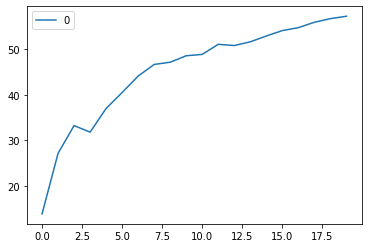

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# **Not for this dataset**

In [ ]:
#from sklearn.preprocessing import LabelEncoder  

In [ ]:
#data = data.dropna()
#data[['area_type', 'availability' , 'location', 'size','society','total_sqft']] = data[['area_type', 'availability', 'location', 'size','society','total_sqft']].apply(LabelEncoder().fit_transform)